In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 400

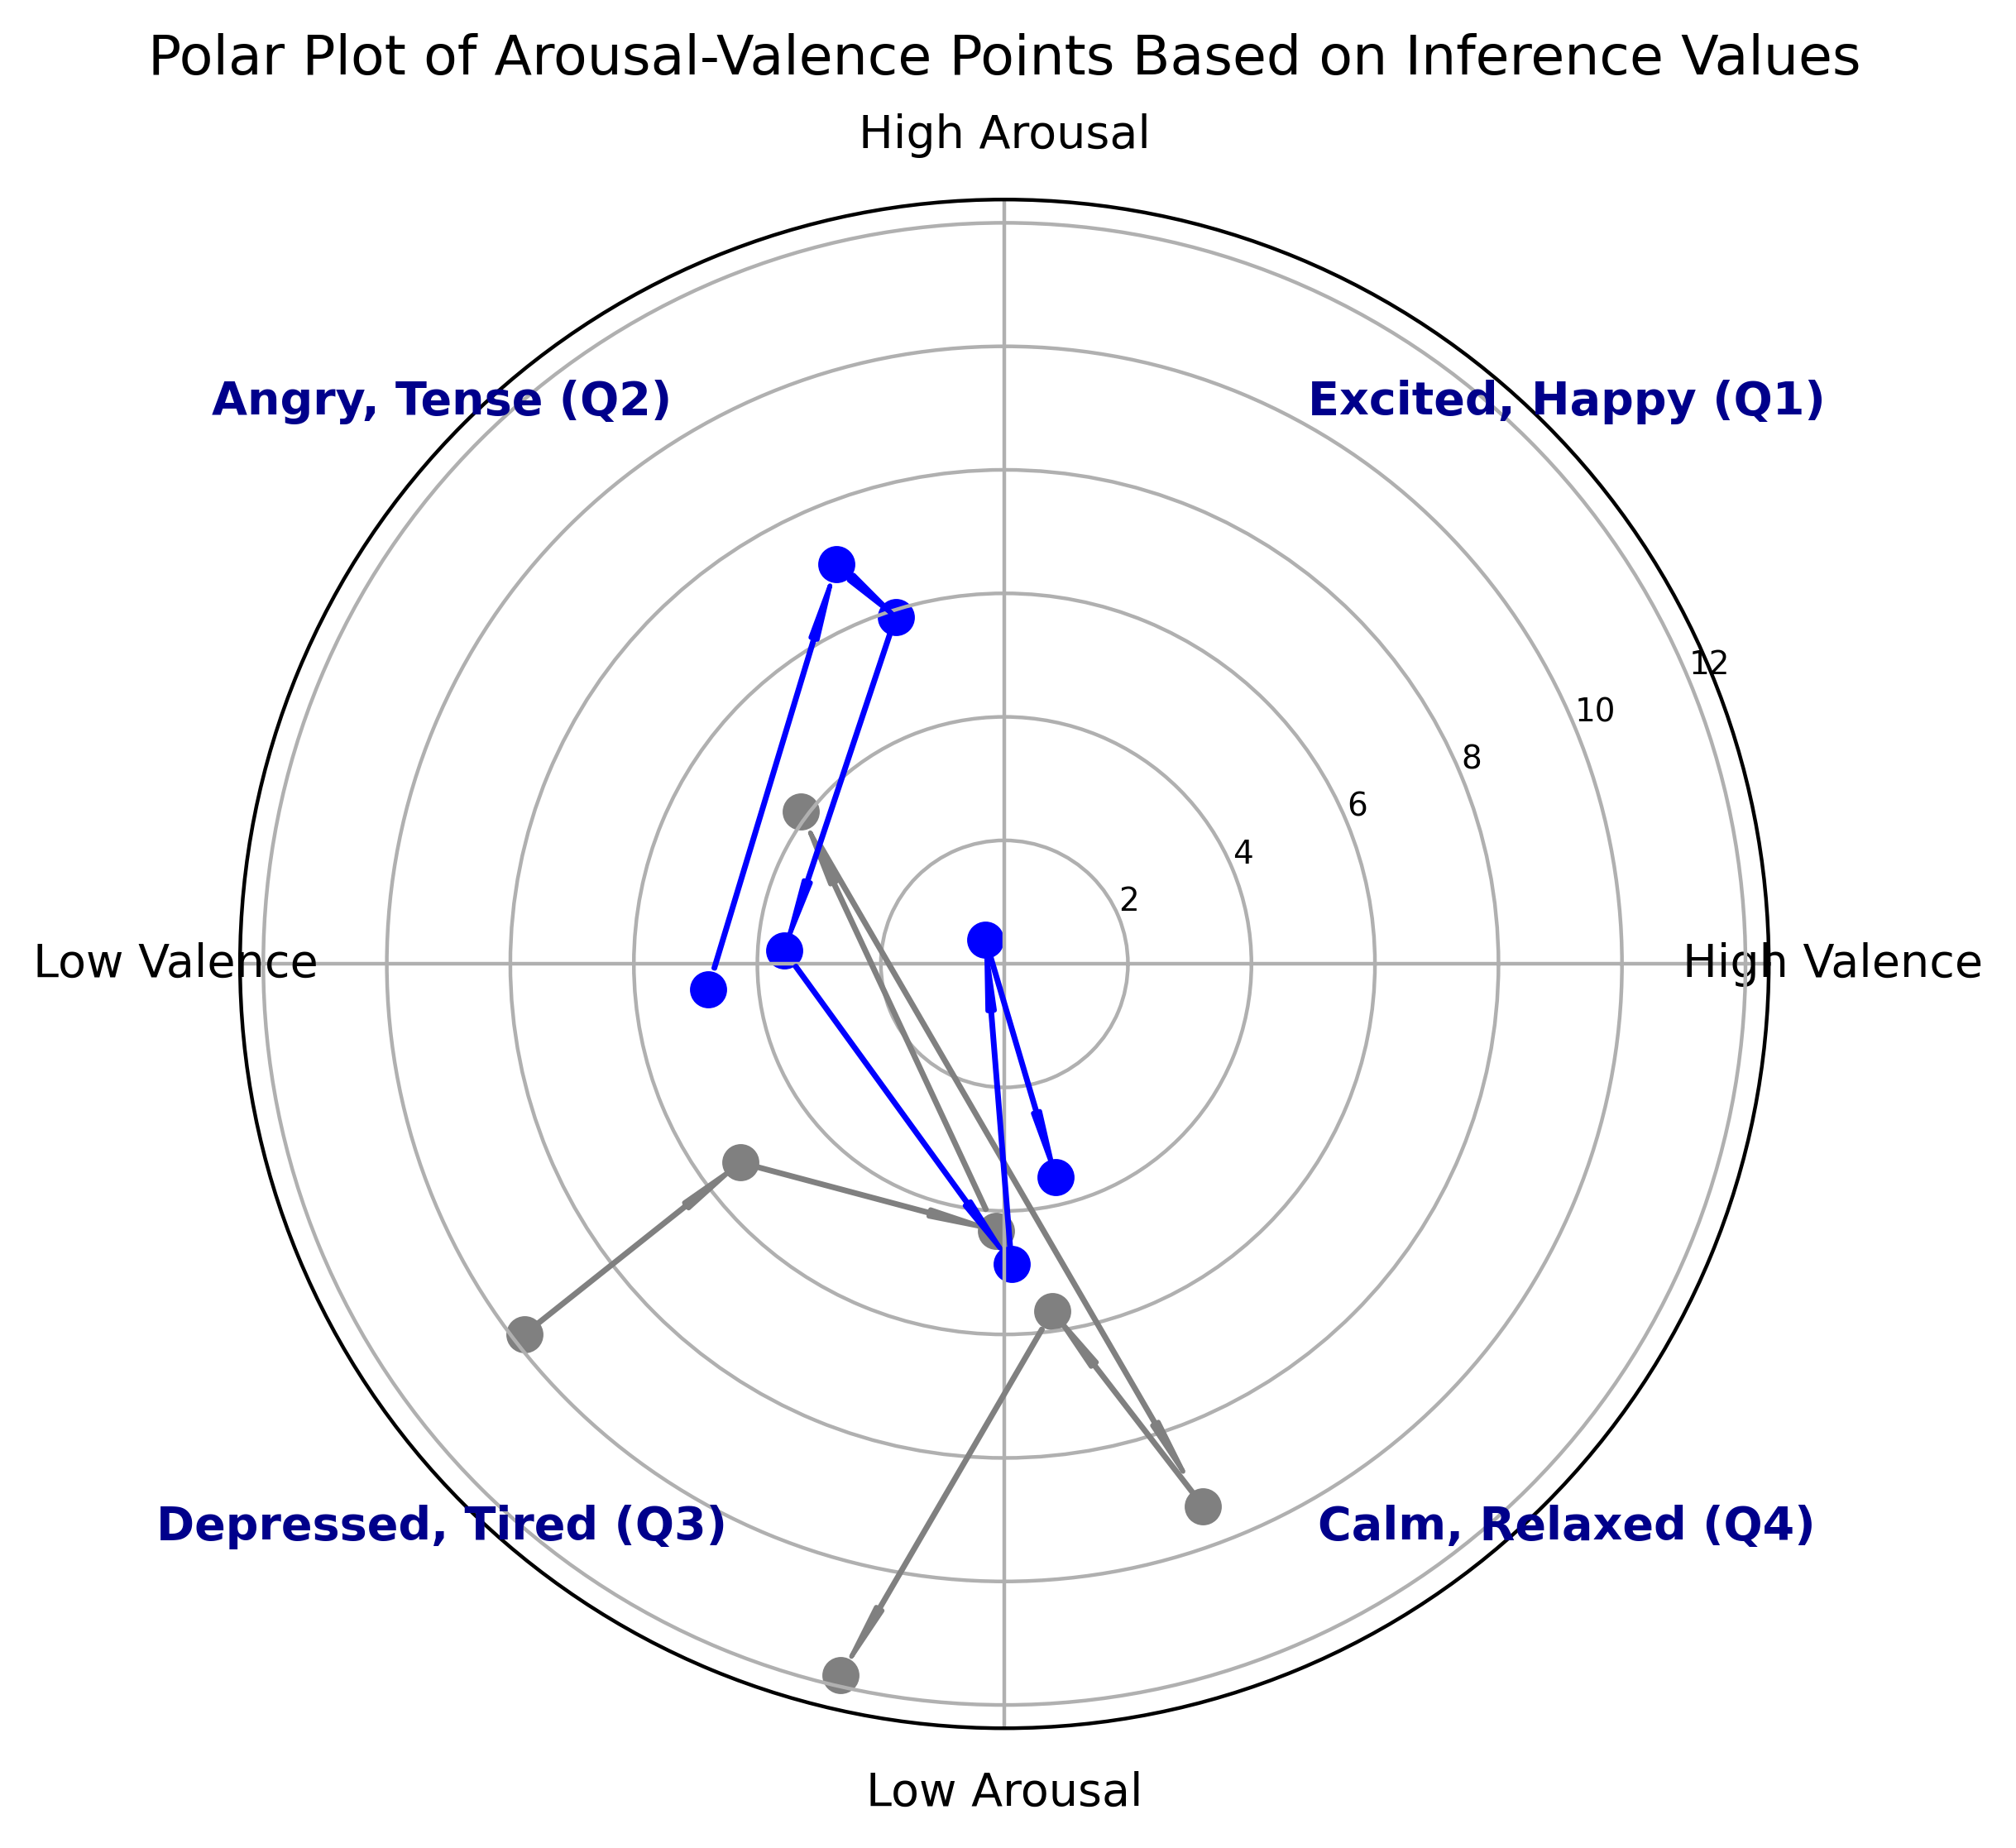

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline
plt.rcParams["figure.dpi"] = 400

# Inference values provided by the user
reference = [
    [-6.165055, -2.1734955, 7.600179, -3.949287],
    [-3.0444396, -1.6940641, 4.446352, -2.751451],
    [-2.2787278, -2.8758483, 2.1797452, 1.3007731],
    [-0.71275306, 1.4304686, 0.12442751, -4.333497],
    [-5.3376374, -5.098954, 0.2254796, 6.9016657],
    [-4.0786886, -2.603933, 0.7616614, 3.797429],
    [-7.651623, -5.261403, 6.506995, 3.6019073]
]

student = [
    [-2.3713815212249756, 0.19491681456565857, 2.845031976699829, -4.192529678344727],
    [1.5961027145385742, 2.9287049770355225, -2.152317762374878, -6.258893013000488],
    [1.0486832857131958, 2.9025990962982178, -2.8082234859466553, -4.477653503417969],
    [-1.1034798622131348, 0.08848405629396439, 2.2461588382720947, -3.6906793117523193],
    [-3.125661611557007, -2.547839403152466, 1.6177899837493896, 2.4257748126983643],
    [-0.3162992298603058, -0.22060734033584595, -0.40518590807914734, -0.9252876043319702],
    [-1.4465782642364502, -3.026231527328491, 1.1749249696731567, 1.2557706832885742]
]

def draw_ar_vl_path(reference, student, output_path=None):
    def transform_to_arousal_valence(quadrant_scores):
        """
        Transforms a 4-dimensional quadrant score into a 2-dimensional (valence, arousal) point.
        """
        # Normalize quadrant scores
    #     normalized_scores = (quadrant_scores - np.mean(quadrant_scores)) / np.std(quadrant_scores)
        normalized_scores = quadrant_scores

        # Calculate valence as the difference between positive and negative quadrants
        valence = np.mean([normalized_scores[0], normalized_scores[3]]) - np.mean([normalized_scores[1], normalized_scores[2]])

        # Calculate arousal as the difference between high-arousal and low-arousal quadrants
        arousal = np.mean([normalized_scores[0], normalized_scores[1]]) - np.mean([normalized_scores[2], normalized_scores[3]])

        return valence, arousal

    # Plotting in polar coordinates
    plt.figure(figsize=(6, 6))
    ax = plt.subplot(projection='polar')

    def draw_polar_coordinates(inference_values, ax, color):
        # Apply transformation to each inference value set
        arousal_valence_points = [transform_to_arousal_valence(np.array(scores)) for scores in inference_values]

        # Extract valence and arousal coordinates
        valence_coords, arousal_coords = zip(*arousal_valence_points)

        # Convert (valence, arousal) to polar coordinates (theta, r)
        theta = np.arctan2(arousal_coords, valence_coords)
        r = np.sqrt(np.array(valence_coords)**2 + np.array(arousal_coords)**2)

        ax.scatter(theta, r, s=50, color=color, label=f'Reference')  # Set color and size for each point

        for i in range(1, len(theta)):
            ax.annotate('', xy=(theta[i], r[i]), xytext=(theta[i-1], r[i-1]),
                        arrowprops=dict(facecolor=color, edgecolor=color, shrink=0.05, width=.25, headwidth=1.5))

    draw_polar_coordinates(reference, ax, "grey")
    draw_polar_coordinates(student, ax, "blue")


    ax.set_title("Polar Plot of Arousal-Valence Points Based on Inference Values", va='bottom')
    ax.tick_params(axis='y', labelsize=7)

    # Define axis and quadrant labels
    axis_labels = ["High Valence", "High Arousal", "Low Valence", "Low Arousal"]
    quadrant_labels = ["Excited, Happy (Q1)", "Angry, Tense (Q2)", "Depressed, Tired (Q3)", "Calm, Relaxed (Q4)"]

    # Define angles for axis labels and quadrant labels
    angles = [0, np.pi/2, np.pi, 3*np.pi/2]

    # Set axis labels
    ax.set_xticks(angles)
    ax.set_xticklabels(axis_labels)

    # Set quadrant labels
    for angle, label in zip(angles, quadrant_labels):
        ax.text(angle+np.pi/4, ax.get_ylim()[1] + 0.5, label, ha='center', va='center', fontsize=10, color="darkblue", weight="bold")

    if output_path != None:
        plt.savefig(f"{output_path}", transparent=True, bbox_inches="tight")
    else:
        plt.savefig(f"{time.strftime('%Y%m%d-%H%M%S')}.png", transparent=True, bbox_inches="tight")
    plt.show()
    
draw_ar_vl_path(reference, student)

* Quadrant 1 (Q1) - Positive Valence, High Arousal (e.g., Excited, Happy)
* Quadrant 2 (Q2) - Negative Valence, High Arousal (e.g., Angry, Tense)
* Quadrant 3 (Q3) - Negative Valence, Low Arousal (e.g., Depressed, Tired)
* Quadrant 4 (Q4) - Positive Valence, Low Arousal (e.g., Calm, Relaxed)